In [1]:
import numpy as np
import matplotlib.pyplot as plt
import einops
from itertools import product

one-dimensional problem : $G(x,y)$ asymptotially smooth

$$u(x) = \int_{\Omega} G(x,y) e^{\mathrm{i}k|x-y|} u(y) \mathrm{d}y, \quad x \in \Omega$$

where $\Omega \subset [-1,1] \times [1,-1]$

$$G(x,y) = \frac{1}{|y-x|}$$

and

$$u(y)=\mathrm{sin}(ky^1)\mathrm{sin}(ky^2), y \in \Omega$$

In [11]:
n = 2**6+1
h = 2/(n-1)
x1h = np.linspace(-1,1,n).tolist()
x2h = x1h
xh = list(product(x1h, x2h))
xhh = list(product(xh, xh))
xhh = np.array(xhh).reshape(-1,4)

In [12]:
xp = xhh[:,0] - xhh[:,2] + h/2
yp = xhh[:,1] - xhh[:,3] + h/2
xm = xhh[:,0] - xhh[:,2] - h/2
ym = xhh[:,1] - xhh[:,3] - h/2
Ghh = np.abs(xp) * np.arcsinh(yp/xp) + np.abs(yp) * np.arcsinh(xp/yp) - \
      np.abs(xm) * np.arcsinh(yp/xm) - np.abs(yp) * np.arcsinh(xm/yp) - \
      np.abs(xp) * np.arcsinh(ym/xp) - np.abs(ym) * np.arcsinh(xp/ym) + \
      np.abs(xm) * np.arcsinh(ym/xm) + np.abs(ym) * np.arcsinh(xm/ym)

In [13]:
Ghh = Ghh.reshape(n,n,n,n)

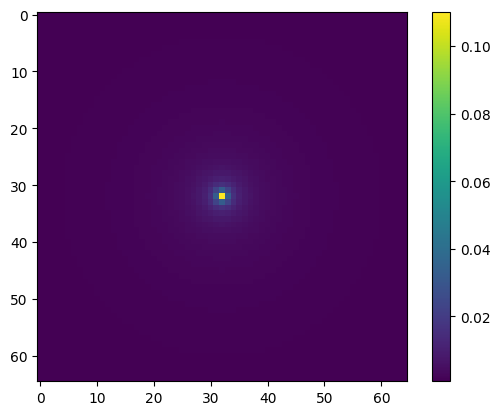

In [19]:
plt.imshow(Ghh[32,32])
plt.colorbar()

In [20]:
Ghh.max()

0.11017169837744288

In [21]:
Ghh.min()

0.0003452687391956033

In [17]:
Ghh.shape

(65, 65, 65, 65)